# Import necessary libraries

In [109]:
!pip install openpyxl
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Load & Analyze the dataset

In [179]:
file_path = "colelithiasis_dataset.xlsx"  # Update with your file path
data = pd.read_excel(file_path)
data.head()

,Patient No.,Gender,Age,Family history,Height,Weight,BMI,Obese/non obese,Cholesterol,Triglycerides level,HDL level,LDL level,VLDL level,Health_status
0,1,Female,65,No,1.64,64,23.80,Non-obese,145,119,60,66.0,19.0,healthy
1,2,Female,50,Yes,1.70,70,24.22,Non-obese,220,107,69,134.0,17.0,healthy
2,3,Female,45,No,1.67,63,22.59,Non-obese,190,251,42,108.0,40.0,healthy
3,4,Female,48,No,1.61,79,30.48,Obese,228,185,65,134.0,29.0,healthy
4,5,Male,74,No,1.76,83,26.79,Non-obese,157,113,49,90.0,18.0,healthy


In [180]:
# Drop unnecessary columns (e.g., Patient No.)
data = data.drop(columns=['Patient No.'])
data.head()

,Gender,Age,Family history,Height,Weight,BMI,Obese/non obese,Cholesterol,Triglycerides level,HDL level,LDL level,VLDL level,Health_status
0,Female,65,No,1.64,64,23.80,Non-obese,145,119,60,66.0,19.0,healthy
1,Female,50,Yes,1.70,70,24.22,Non-obese,220,107,69,134.0,17.0,healthy
2,Female,45,No,1.67,63,22.59,Non-obese,190,251,42,108.0,40.0,healthy
3,Female,48,No,1.61,79,30.48,Obese,228,185,65,134.0,29.0,healthy
4,Male,74,No,1.76,83,26.79,Non-obese,157,113,49,90.0,18.0,healthy


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               100 non-null    object 
 1   Age                  100 non-null    int64  
 2   Family history       100 non-null    object 
 3   Height               100 non-null    float64
 4   Weight               100 non-null    int64  
 5   BMI                  100 non-null    float64
 6   Obese/non obese      100 non-null    object 
 7   Cholesterol          100 non-null    int64  
 8   Triglycerides level  100 non-null    int64  
 9   HDL level            100 non-null    int64  
 10  LDL level            100 non-null    float64
 11  VLDL level           100 non-null    float64
 12  Health_status        100 non-null    object 
dtypes: float64(4), int64(5), object(4)
memory usage: 10.3+ KB


### Encode categorical variables

In [183]:
# encode that target 
data['Health_status'].replace({'healthy': 0, 'patient': 1}, inplace=True)
data.head()

,Gender,Age,Family history,Height,Weight,BMI,Obese/non obese,Cholesterol,Triglycerides level,HDL level,LDL level,VLDL level,Health_status
0,Female,65,No,1.64,64,23.80,Non-obese,145,119,60,66.0,19.0,0
1,Female,50,Yes,1.70,70,24.22,Non-obese,220,107,69,134.0,17.0,0
2,Female,45,No,1.67,63,22.59,Non-obese,190,251,42,108.0,40.0,0
3,Female,48,No,1.61,79,30.48,Obese,228,185,65,134.0,29.0,0
4,Male,74,No,1.76,83,26.79,Non-obese,157,113,49,90.0,18.0,0


In [187]:
print(data.columns.tolist())

['Gender', 'Age', 'Family history', 'Height', 'Weight', 'BMI', 'Obese/non obese', 'Cholesterol', 'Triglycerides level', 'HDL level', 'LDL level', 'VLDL level', 'Health_status']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



categorical_columns = ['Gender','Family history','Obese/non obese']
numerical_columns = [col_name for col_name in data.columns if col_name not in categorical_columns]

encoder = OrdinalEncoder()

data[categorical_columns] = encoder.fit_transform(data[categorical_columns])
data.head()

,Gender,Age,Family history,Height,Weight,BMI,Obese/non obese,Cholesterol,Triglycerides level,HDL level,LDL level,VLDL level,Health_status
0,0.0,65,0.0,1.64,64,23.80,0.0,145,119,60,66.0,19.0,0
1,0.0,50,1.0,1.70,70,24.22,0.0,220,107,69,134.0,17.0,0
2,0.0,45,0.0,1.67,63,22.59,0.0,190,251,42,108.0,40.0,0
3,0.0,48,0.0,1.61,79,30.48,1.0,228,185,65,134.0,29.0,0
4,1.0,74,0.0,1.76,83,26.79,0.0,157,113,49,90.0,18.0,0


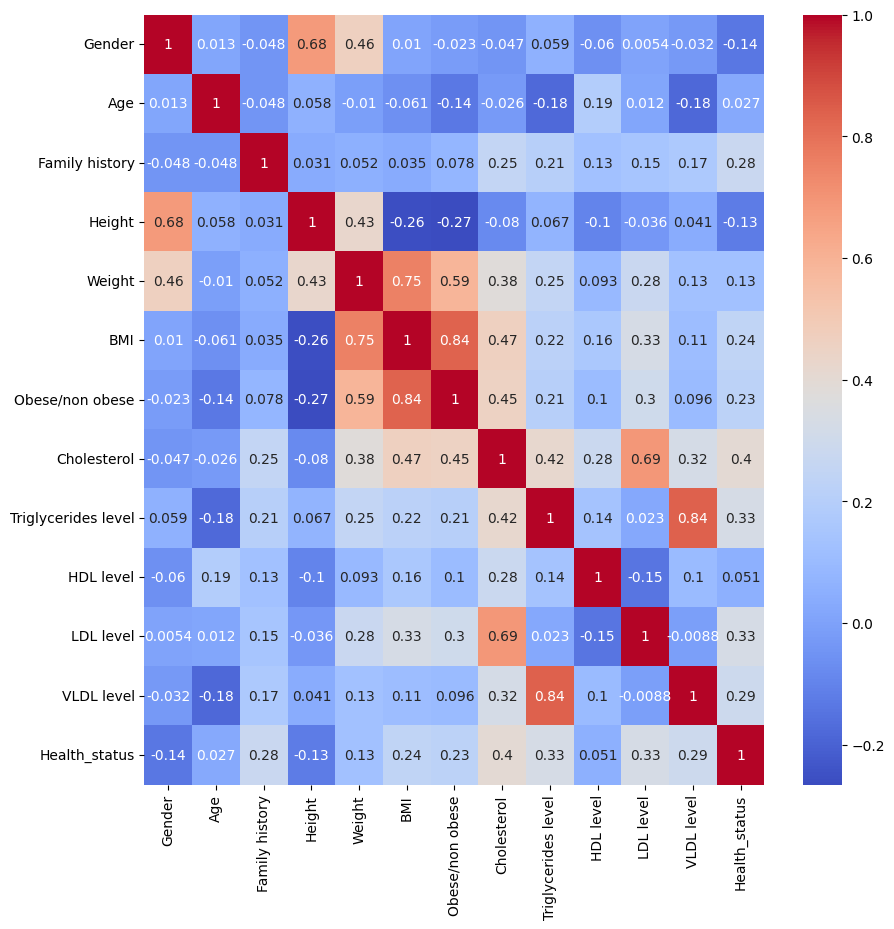

In [168]:
# display the heatmap of correlation matrix of the dataset
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(numeric_only=False), annot=True, cmap='coolwarm')
plt.show()

### Split the dataset

In [197]:
# Features and target
X = data.drop(columns=['Health_status','Age','HDL level'])
y = data['Health_status']

numerical_columns = [col_name for col_name in X.columns if col_name not in categorical_columns and col_name not in ['Health_status','Age','HDL level']]
print(numerical_columns)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

['Height', 'Weight', 'BMI', 'Cholesterol', 'Triglycerides level', 'LDL level', 'VLDL level']


### Scale the features

In [198]:
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# SVM Models

### SVM Classifier with Linear Kernel

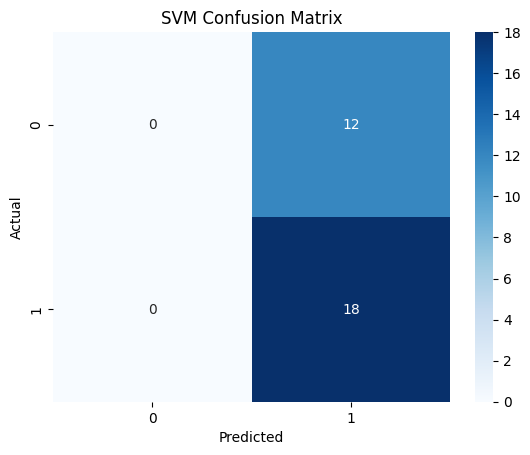

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.60      1.00      0.75        18

    accuracy                           0.60        30
   macro avg       0.30      0.50      0.38        30
weighted avg       0.36      0.60      0.45        30

SVM Accuracy: 0.6


In [199]:
svm_model_linear = SVC(kernel='linear', random_state=42, C= 0.002, class_weight='balanced')
svm_model_linear.fit(X_train, y_train)
svm_linear_preds = svm_model_linear.predict(X_test)

svm_linear_cm = confusion_matrix(y_test, svm_linear_preds)
plt.figure()
sns.heatmap(svm_linear_cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, svm_linear_preds))
print(f'SVM Accuracy: {accuracy_score(y_test, svm_linear_preds)}')

### SVM Classifier with polynomial Kernel

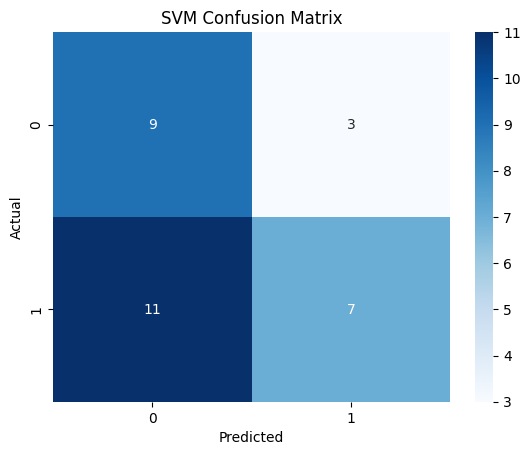

              precision    recall  f1-score   support

           0       0.45      0.75      0.56        12
           1       0.70      0.39      0.50        18

    accuracy                           0.53        30
   macro avg       0.57      0.57      0.53        30
weighted avg       0.60      0.53      0.53        30

SVM Accuracy: 0.5333333333333333


In [200]:
svm_model_poly = SVC(kernel='poly', random_state=42, C= 1, class_weight='balanced')
svm_model_poly.fit(X_train, y_train)
svm_poly_preds = svm_model_poly.predict(X_test)

svm_poly_cm = confusion_matrix(y_test, svm_poly_preds)
plt.figure()
sns.heatmap(svm_poly_cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, svm_poly_preds))
print(f'SVM Accuracy: {accuracy_score(y_test, svm_poly_preds)}')



### SVM Classifier with RBF Kernel

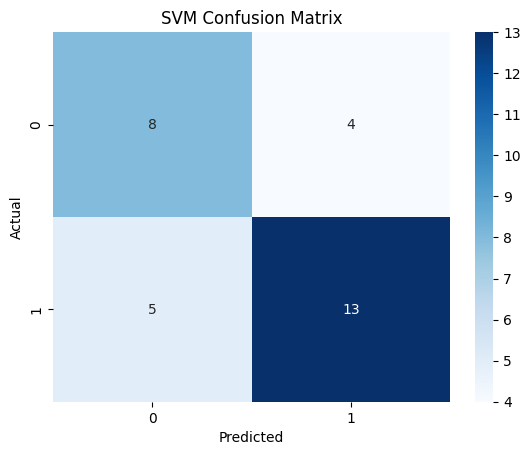

              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.76      0.72      0.74        18

    accuracy                           0.70        30
   macro avg       0.69      0.69      0.69        30
weighted avg       0.70      0.70      0.70        30

SVM Accuracy: 0.7


In [201]:
svm_model_rbf = SVC(kernel='rbf', random_state=42, C= 0.3, class_weight='balanced')
svm_model_rbf.fit(X_train, y_train)
svm_rbf_preds = svm_model_rbf.predict(X_test)

svm_rbf_cm = confusion_matrix(y_test, svm_rbf_preds)
plt.figure()
sns.heatmap(svm_rbf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, svm_rbf_preds))
print(f'SVM Accuracy: {accuracy_score(y_test, svm_rbf_preds)}')

# Random Forest Models

### Random Forest Classifier

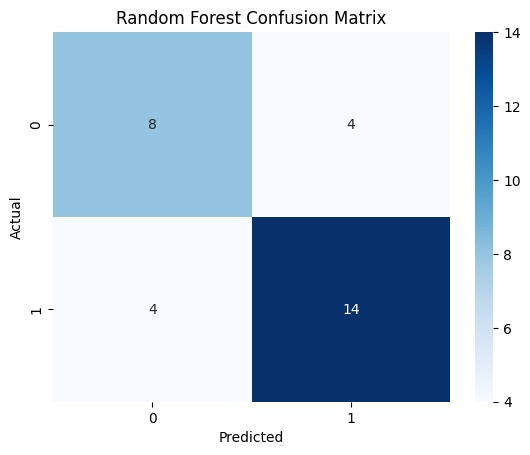

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.78      0.78      0.78        18

    accuracy                           0.73        30
   macro avg       0.72      0.72      0.72        30
weighted avg       0.73      0.73      0.73        30

Random Forest Accuracy: 0.7333333333333333


In [202]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

rf_cm = confusion_matrix(y_test, rf_preds)
plt.figure()
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, rf_preds))
print(f'Random Forest Accuracy: {accuracy_score(y_test, rf_preds)}')


### RF Boosted version using Gradient Boosting

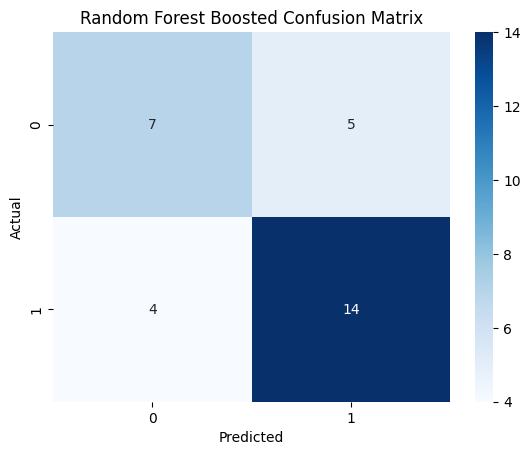

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.74      0.78      0.76        18

    accuracy                           0.70        30
   macro avg       0.69      0.68      0.68        30
weighted avg       0.70      0.70      0.70        30

Random Forest Boosted Accuracy: 0.7


In [203]:
rf_boosted = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
rf_boosted.fit(X_train, y_train)
y_pred_rf_boosted = rf_boosted.predict(X_test)


rf_boosted_cm = confusion_matrix(y_test, y_pred_rf_boosted)
plt.figure()
sns.heatmap(rf_boosted_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Boosted Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred_rf_boosted))
print(f'Random Forest Boosted Accuracy: {accuracy_score(y_test, y_pred_rf_boosted)}')


# Gaussian Discriminant Analysis (GDA)

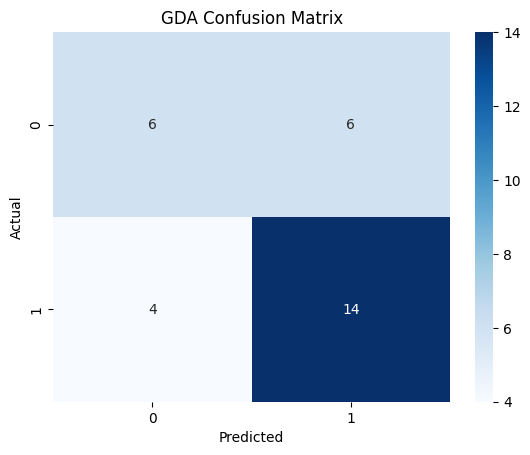

              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.70      0.78      0.74        18

    accuracy                           0.67        30
   macro avg       0.65      0.64      0.64        30
weighted avg       0.66      0.67      0.66        30

GDA Accuracy: 0.6666666666666666


In [204]:
gda = QuadraticDiscriminantAnalysis()
gda.fit(X_train, y_train)
y_pred_gda = gda.predict(X_test)

gda_cm = confusion_matrix(y_test, y_pred_gda)
plt.figure()
sns.heatmap(gda_cm, annot=True, fmt='d', cmap='Blues')
plt.title('GDA Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred_gda))
print(f'GDA Accuracy: {accuracy_score(y_test, y_pred_gda)}')


# Logistic Regression

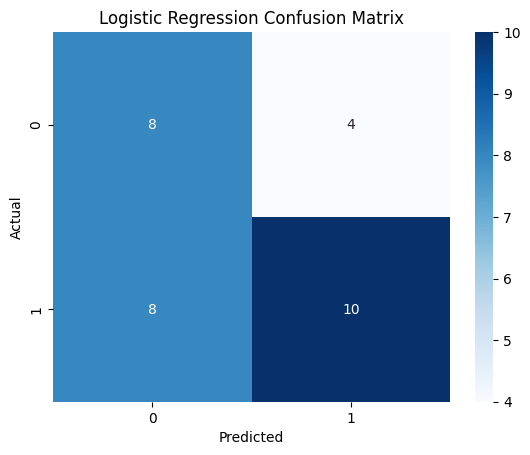

              precision    recall  f1-score   support

           0       0.50      0.67      0.57        12
           1       0.71      0.56      0.62        18

    accuracy                           0.60        30
   macro avg       0.61      0.61      0.60        30
weighted avg       0.63      0.60      0.60        30

Logistic Regression Accuracy: 0.6


In [205]:
lr_model = LogisticRegression(random_state=42, C= 0.001, penalty= 'l2' ,class_weight='balanced')
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)


lr_cm = confusion_matrix(y_test, lr_preds)
plt.figure()
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, lr_preds))
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, lr_preds)}')


# Leave-One-Out Cross Validation (LOOCV)

In [206]:
loo = LeaveOneOut()

scores_svm_linear = cross_val_score(svm_model_linear, X, y, cv=loo)
scores_svm_poly = cross_val_score(svm_model_poly, X, y, cv=loo)
scores_svm_rbf = cross_val_score(svm_model_rbf, X, y, cv=loo)
scores_rf = cross_val_score(rf_model, X, y, cv=loo)
scores_rf_boosted = cross_val_score(rf_boosted, X, y, cv=loo)
scores_lr = cross_val_score(lr_model, X, y, cv=loo)
scores_gda = cross_val_score(gda, X, y, cv=loo)


# Print the results
print("LOOCV (SVM Linear) Accuracy:", scores_svm_linear.mean())
print("LOOCV (SVM Poly) Accuracy:", scores_svm_poly.mean())
print("LOOCV (SVM RBF) Accuracy:", scores_svm_rbf.mean())
print("LOOCV (RF) Accuracy:", scores_rf.mean())
print("LOOCV (RF Boosted) Accuracy:", scores_rf_boosted.mean())
print("LOOCV (LR) Accuracy:", scores_lr.mean())
print("LOOCV (GDA) Accuracy:", scores_gda.mean())

LOOCV (SVM Linear) Accuracy: 0.74
LOOCV (SVM Poly) Accuracy: 0.64
LOOCV (SVM RBF) Accuracy: 0.68
LOOCV (RF) Accuracy: 0.71
LOOCV (RF Boosted) Accuracy: 0.69
LOOCV (LR) Accuracy: 0.69
LOOCV (GDA) Accuracy: 0.69


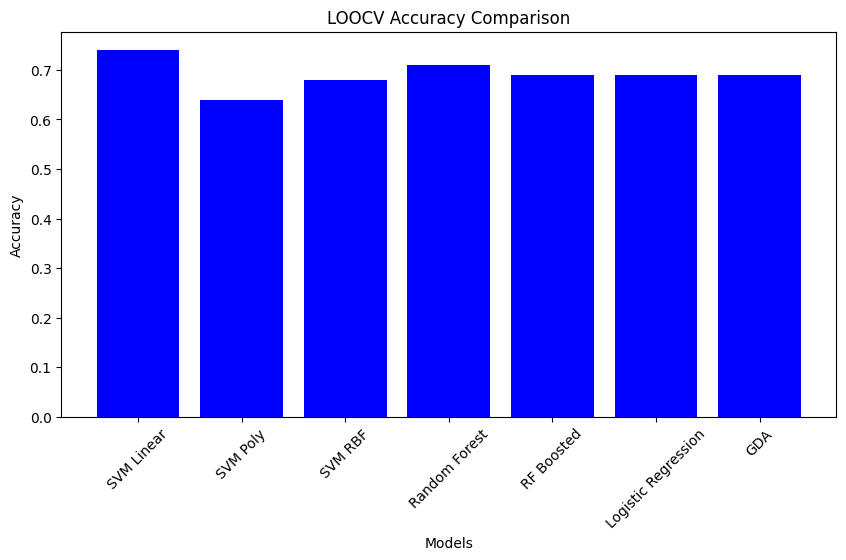

In [148]:
# Compare the effects
import matplotlib.pyplot as plt

models = ['SVM Linear', 'SVM Poly', 'SVM RBF', 'Random Forest', 'RF Boosted', 'Logistic Regression', 'GDA']
scores = [scores_svm_linear.mean(), scores_svm_poly.mean(), scores_svm_rbf.mean(), scores_rf.mean(), scores_rf_boosted.mean(), scores_lr.mean(), scores_gda.mean()]

plt.figure(figsize=(10, 5))
plt.bar(models, scores, color='blue')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('LOOCV Accuracy Comparison')
plt.show()



In [207]:
#saving all the models
import joblib
joblib.dump(svm_model_linear, 'svm_model_linear.pkl')
joblib.dump(svm_model_poly, 'svm_model_poly.pkl')
joblib.dump(svm_model_rbf, 'svm_model_rbf.pkl')
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(rf_boosted, 'rf_boosted.pkl')
joblib.dump(lr_model, 'lr_model.pkl')
joblib.dump(gda, 'gda.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoder.pkl')


['encoder.pkl']

### Saving test data to another file for using in dashboard

In [150]:
X_test = pd.DataFrame(X_test, columns=X.columns)
# X_test.head()
X_test.reset_index(drop=True, inplace=True)
X_test[numerical_columns] = scaler.inverse_transform(X_test[numerical_columns])
X_test.head()

,Gender,Family history,Height,Weight,BMI,Obese/non obese,Cholesterol,Triglycerides level,LDL level,VLDL level
0,0.0,1.0,1.73,82.0,27.40,0.0,226.0,246.0,190.0,39.36
1,0.0,1.0,1.64,82.0,30.49,1.0,187.0,118.0,142.0,18.88
2,1.0,0.0,1.70,76.0,26.30,0.0,132.0,125.0,160.0,20.00
3,1.0,1.0,1.69,94.0,32.91,1.0,199.0,106.0,113.0,16.00
4,0.0,1.0,1.53,77.0,32.89,1.0,201.0,136.0,190.0,21.76


In [151]:
# Check the shape of scaler parameters
print("Scaler mean shape:", scaler.mean_.shape)
print("Scaler scale shape:", scaler.scale_.shape)

# Check the columns of the test dataset
print("Test data columns:", X_test.columns)

# Check numerical columns list
print("Numerical columns:", numerical_columns)


Scaler mean shape: (10,)
Scaler scale shape: (10,)
Test data columns: Index(['Gender', 'Family history', 'Height', 'Weight', 'BMI',
       'Obese/non obese', 'Cholesterol', 'Triglycerides level', 'LDL level',
       'VLDL level'],
      dtype='object')
Numerical columns: ['Gender', 'Family history', 'Height', 'Weight', 'BMI', 'Obese/non obese', 'Cholesterol', 'Triglycerides level', 'LDL level', 'VLDL level']


In [152]:
y_test = pd.DataFrame(y_test, columns=['Health_status'])
y_test.reset_index(drop=True, inplace=True)
y_test.head()

,Health_status
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0


In [153]:
y_test.value_counts()

Health_status
1.0              15
0.0              10
Name: count, dtype: int64

In [154]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Health_status  25 non-null     float64
dtypes: float64(1)
memory usage: 332.0 bytes


In [155]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data.head()

,Gender,Family history,Height,Weight,BMI,Obese/non obese,Cholesterol,Triglycerides level,LDL level,VLDL level,Health_status
0,0.0,1.0,1.73,82.0,27.40,0.0,226.0,246.0,190.0,39.36,1.0
1,0.0,1.0,1.64,82.0,30.49,1.0,187.0,118.0,142.0,18.88,1.0
2,1.0,0.0,1.70,76.0,26.30,0.0,132.0,125.0,160.0,20.00,1.0
3,1.0,1.0,1.69,94.0,32.91,1.0,199.0,106.0,113.0,16.00,0.0
4,0.0,1.0,1.53,77.0,32.89,1.0,201.0,136.0,190.0,21.76,1.0


In [156]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               25 non-null     float64
 1   Family history       25 non-null     float64
 2   Height               25 non-null     float64
 3   Weight               25 non-null     float64
 4   BMI                  25 non-null     float64
 5   Obese/non obese      25 non-null     float64
 6   Cholesterol          25 non-null     float64
 7   Triglycerides level  25 non-null     float64
 8   LDL level            25 non-null     float64
 9   VLDL level           25 non-null     float64
 10  Health_status        25 non-null     float64
dtypes: float64(11)
memory usage: 2.3 KB


In [157]:
test_data['Health_status']

0     1.0
1     1.0
2     1.0
3     0.0
4     1.0
5     1.0
6     0.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    0.0
14    1.0
15    0.0
16    0.0
17    1.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    1.0
24    1.0
Name: Health_status, dtype: float64

In [158]:
test_data[categorical_columns]=encoder.inverse_transform(test_data[categorical_columns].astype(int))
test_data.head()

,Gender,Family history,Height,Weight,BMI,Obese/non obese,Cholesterol,Triglycerides level,LDL level,VLDL level,Health_status
0,Female,Yes,1.73,82.0,27.40,Non-obese,226.0,246.0,190.0,39.36,patient
1,Female,Yes,1.64,82.0,30.49,Obese,187.0,118.0,142.0,18.88,patient
2,Male,No,1.70,76.0,26.30,Non-obese,132.0,125.0,160.0,20.00,patient
3,Male,Yes,1.69,94.0,32.91,Obese,199.0,106.0,113.0,16.00,healthy
4,Female,Yes,1.53,77.0,32.89,Obese,201.0,136.0,190.0,21.76,patient


In [159]:
test_data[numerical_columns] = scaler.inverse_transform(test_data[numerical_columns])
test_data.head()

ValueError: could not convert string to float: 'Female'

In [161]:
test_data.to_excel('test_data.xlsx', index=False)